##### Working with the Training Dataset to build the model which would be used to predict the sales of the testing dataset

### Importing the basic necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Desktop\sales_prediction\Train.csv")

### Data Exploration

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [5]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [6]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['Low Fat','LF','low fat'],value=0)
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['Regular','reg'],value=1)
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [9]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [10]:
data['Outlet_Size'].value_counts()

#data

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The following method represents the percentage of data missing in each column with the help of a graph

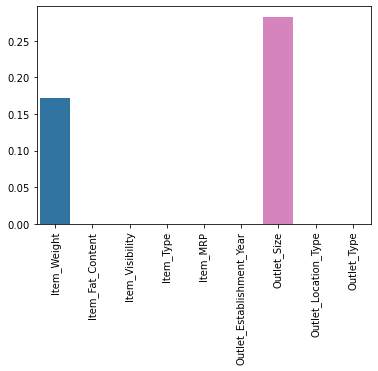

In [11]:
a=data['Item_Weight'].isna().sum()/len(data)
b=data['Item_Fat_Content'].isna().sum()/len(data)
c=data['Item_Visibility'].isna().sum()/len(data)
d=data['Item_Type'].isna().sum()/len(data)
e=data['Item_MRP'].isna().sum()/len(data)
f=data['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data['Outlet_Size'].isna().sum()/len(data)
h=data['Outlet_Location_Type'].isna().sum()/len(data)
i=data['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


In [12]:
data1=data

data1['Outlet_Size']=data1['Outlet_Size'].replace('Small',value=0)
data1['Outlet_Size']=data1['Outlet_Size'].replace('Medium',value=1)
data1['Outlet_Size']=data1['Outlet_Size'].replace('High',value=2)


data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 3',value=1)
data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 2',value=2)
data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 1',value=3)

In [13]:
data1.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Location_Type        -0.089367
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_Fat_Content             0.018719
Outlet_Size                  0.129076
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [14]:
data1.corr()['Item_MRP'].sort_values()

Outlet_Size                 -0.005827
Item_Visibility             -0.001315
Outlet_Location_Type        -0.000232
Outlet_Establishment_Year    0.005020
Item_Fat_Content             0.006063
Item_Weight                  0.027141
Item_Outlet_Sales            0.567574
Item_MRP                     1.000000
Name: Item_MRP, dtype: float64

In [15]:
data1['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:




data_outletsize_notnan=data[data['Outlet_Size'].notna()]

data_outletsize_notnan.reset_index(drop=True)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,3,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,1,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1.0,3,Supermarket Type1,2097.2700
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2.0,1,Supermarket Type1,994.7052
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,1,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
6108,FDF53,20.750,1,0.083607,Frozen Foods,178.8318,OUT046,1997,0.0,3,Supermarket Type1,3608.6360
6109,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,1,Supermarket Type1,2778.3834
6110,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0.0,2,Supermarket Type1,1193.1136
6111,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1.0,1,Supermarket Type2,1845.5976


From the dataset with missing outlet sizes, it can be seen that they belong to only two of all those categories

In [17]:
data_Iw_nan=data[data['Outlet_Size'].isna()]
data_Iw_nan['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [18]:
data_nan_supr=data_Iw_nan[data_Iw_nan['Outlet_Type']=='Supermarket Type1']
data_supr=data[data['Outlet_Type']=='Supermarket Type1']



data_nan_grocery=data_Iw_nan[data_Iw_nan['Outlet_Type']=='Grocery Store']
data_grocery=data[data['Outlet_Type']=='Grocery Store']


From this plot, it is seen that in the original dataset, in case when outlet type is Supermarket, 
all the outlets are present in outlet_location_type 2 and have a Outlet_size of 0

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Size'>

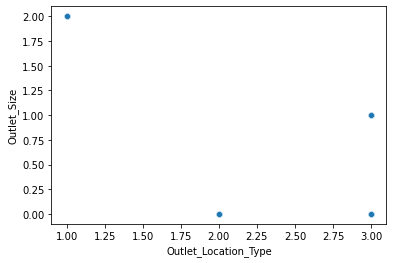

In [19]:
sns.scatterplot(x=data_supr['Outlet_Location_Type'], y=data_supr['Outlet_Size'])

Also in case of missing values of Supermarket type,  all the outlets are located in location type 2. 

In [20]:
data_nan_supr['Outlet_Location_Type'].value_counts()

2    1855
Name: Outlet_Location_Type, dtype: int64

Also the moajority of the supermarket outlets have a size of 0. Hence,
an estimate can be made that majority of the supermarket outlets with missing values have a size of 0

In [21]:
data_supr['Outlet_Size'].value_counts()

0.0    1860
2.0     932
1.0     930
Name: Outlet_Size, dtype: int64

Also, in case of the grocery outlets , all the outlets had a size of 0. So, it can be estimated that all the missing
outlet sizes had a size of 0

In [22]:
data_grocery['Outlet_Size'].value_counts()

0.0    528
Name: Outlet_Size, dtype: int64

In [23]:
#filling the nan values thus, accordingly.


data_nan_supr['Outlet_Size'].fillna(value=0.0,inplace=True)
data_nan_grocery['Outlet_Size'].fillna(value=0.0,inplace=True)

data_filled_nans_outletsize=pd.concat([data_nan_supr,data_nan_grocery])
data_filled_nans_outletsize.reset_index(drop=True)



C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDH17,16.20,1,0.016687,Frozen Foods,96.9726,OUT045,2002,0.0,2,Supermarket Type1,1076.5986
1,FDU28,19.20,1,0.094450,Frozen Foods,187.8214,OUT017,2007,0.0,2,Supermarket Type1,4710.5350
2,NCD06,13.00,0,0.099887,Household,45.9060,OUT017,2007,0.0,2,Supermarket Type1,838.9080
3,FDO23,17.85,0,0.000000,Breads,93.1436,OUT045,2002,0.0,2,Supermarket Type1,2174.5028
4,NCP05,19.60,0,0.000000,Health and Hygiene,153.3024,OUT045,2002,0.0,2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,NCE07,8.18,0,0.021977,Household,140.6154,OUT010,1998,0.0,1,Grocery Store,425.4462
2406,FDI16,14.00,1,0.227261,Frozen Foods,54.3640,OUT010,1998,0.0,1,Grocery Store,159.7920
2407,DRI47,14.70,0,0.035016,Hard Drinks,144.3128,OUT010,1998,0.0,1,Grocery Store,431.4384
2408,FDR20,20.00,1,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,0.0,1,Grocery Store,45.2744


In [24]:
data_final=pd.concat([data_outletsize_notnan,data_filled_nans_outletsize])



data_itemweight_notnan=data_final[data_final['Item_Weight'].notna()]

Checking what percentage of missing data still there is

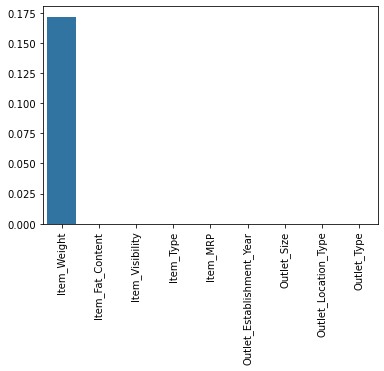

In [25]:
a=data_final['Item_Weight'].isna().sum()/len(data)
b=data_final['Item_Fat_Content'].isna().sum()/len(data)
c=data_final['Item_Visibility'].isna().sum()/len(data)
d=data_final['Item_Type'].isna().sum()/len(data)
e=data_final['Item_MRP'].isna().sum()/len(data)
f=data_final['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data_final['Outlet_Size'].isna().sum()/len(data)
h=data_final['Outlet_Location_Type'].isna().sum()/len(data)
i=data_final['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


In [26]:
#data_dum=pd.get_dummies(data_final,columns=['Outlet_Type','Item_Type'])

In [27]:
#data_dum

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

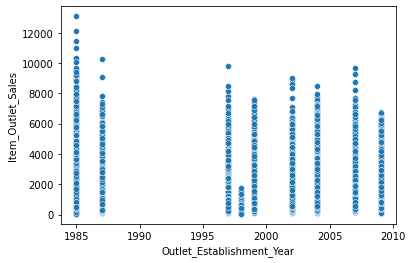

In [28]:

sns.scatterplot(x=data_final['Outlet_Establishment_Year'],y=data_final['Item_Outlet_Sales'])

In [29]:
data_final['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [30]:
#function to encode year with it's differnce from 2011

def year_encoder(data):
    d={1985:26,1987:24,1997:14,1998:13,1999:12,2002:9,2004:7,2007:4,2009:2}
    for k in d:
        data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].replace(to_replace=k, value=d[k])
def year_decoder(data):
    d={1985:26,1987:24,1997:14,1998:13,1999:12,2002:9,2004:7,2007:4,2009:2}
    for k in d:
        data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].replace(value=k, to_replace=d[k])

year_encoder(data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

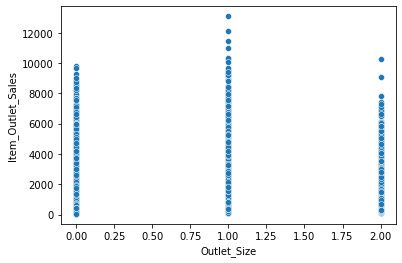

In [31]:
sns.scatterplot(x=data_final['Outlet_Size'],y=data_final['Item_Outlet_Sales'])

In [32]:
data_final.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

data_final.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,3,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,1,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1.0,3,Supermarket Type1,2097.2700
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2.0,1,Supermarket Type1,994.7052
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,1,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCE07,8.180,0,0.021977,Household,140.6154,OUT010,1998,0.0,1,Grocery Store,425.4462
8519,FDI16,14.000,1,0.227261,Frozen Foods,54.3640,OUT010,1998,0.0,1,Grocery Store,159.7920
8520,DRI47,14.700,0,0.035016,Hard Drinks,144.3128,OUT010,1998,0.0,1,Grocery Store,431.4384
8521,FDR20,20.000,1,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,0.0,1,Grocery Store,45.2744


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

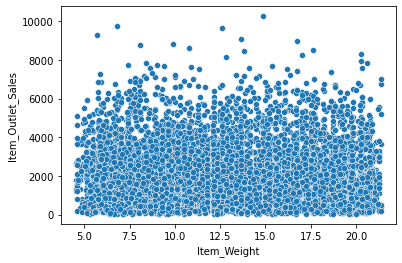

In [33]:
sns.scatterplot(x=data_final['Item_Weight'],y=data_final['Item_Outlet_Sales'])

In [34]:




data_final.reset_index(drop=True)

data_weightnan=data_final[data_final['Item_Weight'].isna()]



#data_final[data_final]

Checking how many item type from each category is present

In [35]:
data_weightnan['Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [36]:
data_weightnan.reset_index(drop=True)
fav=data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean()

data_weightnan[data_weightnan['Item_Type']=='Fruits and Vegetables']['Item_Weight'].fillna(fav,inplace=True)


data_weightnan

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,0,0.127470,Snack Foods,107.7622,OUT027,1985,1.0,1,Supermarket Type3,4022.7636
18,DRI11,NaN,0,0.034238,Hard Drinks,113.2834,OUT027,1985,1.0,1,Supermarket Type3,2303.6680
21,FDW12,NaN,1,0.035400,Baking Goods,144.5444,OUT027,1985,1.0,1,Supermarket Type3,4064.0432
23,FDC37,NaN,0,0.057557,Baking Goods,107.6938,OUT019,1985,0.0,3,Grocery Store,214.3876
29,FDC14,NaN,1,0.072222,Canned,43.6454,OUT019,1985,0.0,3,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,0,0.043792,Soft Drinks,189.0530,OUT027,1985,1.0,1,Supermarket Type3,6261.8490
8487,DRG13,NaN,0,0.037006,Soft Drinks,164.7526,OUT027,1985,1.0,1,Supermarket Type3,4111.3150
8488,NCN14,NaN,0,0.091473,Others,184.6608,OUT027,1985,1.0,1,Supermarket Type3,2756.4120
8490,FDU44,NaN,1,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,0.0,3,Grocery Store,487.3656


In [37]:
data_weightnan.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDP10,NaN,0,0.127470,Snack Foods,107.7622,OUT027,1985,1.0,1,Supermarket Type3,4022.7636
1,DRI11,NaN,0,0.034238,Hard Drinks,113.2834,OUT027,1985,1.0,1,Supermarket Type3,2303.6680
2,FDW12,NaN,1,0.035400,Baking Goods,144.5444,OUT027,1985,1.0,1,Supermarket Type3,4064.0432
3,FDC37,NaN,0,0.057557,Baking Goods,107.6938,OUT019,1985,0.0,3,Grocery Store,214.3876
4,FDC14,NaN,1,0.072222,Canned,43.6454,OUT019,1985,0.0,3,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,DRK37,NaN,0,0.043792,Soft Drinks,189.0530,OUT027,1985,1.0,1,Supermarket Type3,6261.8490
1459,DRG13,NaN,0,0.037006,Soft Drinks,164.7526,OUT027,1985,1.0,1,Supermarket Type3,4111.3150
1460,NCN14,NaN,0,0.091473,Others,184.6608,OUT027,1985,1.0,1,Supermarket Type3,2756.4120
1461,FDU44,NaN,1,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,0.0,3,Grocery Store,487.3656


For each of the columns of a particular Item_type (which is at first segregrated into a different dataframe), if it 
contains null values for the weight column, the nan value is replaced with the mean weight of that particular Item_type
from the original dataset

In [38]:
#fav=data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean()
df_fav=data_weightnan[data_weightnan['Item_Type']=='Fruits and Vegetables']
df_fav.fillna(data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean(),inplace=True)


df_snc=data_weightnan[data_weightnan['Item_Type']=='Snack Foods']
df_snc.fillna(data_final[data_final['Item_Type']=='Snack Foods']['Item_Weight'].mean(),inplace=True)


df_hsld=data_weightnan[data_weightnan['Item_Type']=='Houseold']
df_hsld.fillna(data_final[data_final['Item_Type']=='Houseold']['Item_Weight'].mean(),inplace=True)


df_frzn=data_weightnan[data_weightnan['Item_Type']=='Frozen Foods']
df_frzn.fillna(data_final[data_final['Item_Type']=='Frozen Foods']['Item_Weight'].mean(),inplace=True)


df_dary=data_weightnan[data_weightnan['Item_Type']=='Dairy']
df_dary.fillna(data_final[data_final['Item_Type']=='Dairy']['Item_Weight'].mean(),inplace=True)


df_bkg=data_weightnan[data_weightnan['Item_Type']=='Baking Goods']
df_bkg.fillna(data_final[data_final['Item_Type']=='Baking Goods']['Item_Weight'].mean(),inplace=True)

df_cnnd=data_weightnan[data_weightnan['Item_Type']=='Canned']
df_cnnd.fillna(data_final[data_final['Item_Type']=='Canned']['Item_Weight'].mean(),inplace=True)

df_hah=data_weightnan[data_weightnan['Item_Type']=='Health and Hygiene']
df_hah.fillna(data_final[data_final['Item_Type']=='Health and Hygiene']['Item_Weight'].mean(),inplace=True)


df_met=data_weightnan[data_weightnan['Item_Type']=='Meat']
df_met.fillna(data_final[data_final['Item_Type']=='Meat']['Item_Weight'].mean(),inplace=True)


df_sft=data_weightnan[data_weightnan['Item_Type']=='Soft Drinks']
df_sft.fillna(data_final[data_final['Item_Type']=='Soft Drinks']['Item_Weight'].mean(),inplace=True)


df_brea=data_weightnan[data_weightnan['Item_Type']=='Breads']
df_brea.fillna(data_final[data_final['Item_Type']=='Breads']['Item_Weight'].mean(),inplace=True)

df_oth=data_weightnan[data_weightnan['Item_Type']=='Others']
df_oth.fillna(data_final[data_final['Item_Type']=='Others']['Item_Weight'].mean(),inplace=True)

df_hrdnk=data_weightnan[data_weightnan['Item_Type']=='Hard Drinks']
df_hrdnk.fillna(data_final[data_final['Item_Type']=='Hard Drinks']['Item_Weight'].mean(),inplace=True)

df_brkfst=data_weightnan[data_weightnan['Item_Type']=='Breakfast']
df_brkfst.fillna(data_final[data_final['Item_Type']=='Breakfast']['Item_Weight'].mean(),inplace=True)

df_strchy=data_weightnan[data_weightnan['Item_Type']=='Starchy Foods']
df_strchy.fillna(data_final[data_final['Item_Type']=='Starchy Foods']['Item_Weight'].mean(),inplace=True)

df_seafo=data_weightnan[data_weightnan['Item_Type']=='Sea Foods']
df_seafo.fillna(data_final[data_final['Item_Type']=='Sea Foods']['Item_Weight'].mean(),inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Finally stringing all those dataframes together, now that the nan values are filled

In [39]:
data_weight_fillednan=pd.concat([df_fav, df_snc, df_bkg, df_brea, df_brkfst, df_cnnd, df_dary, df_frzn, df_hah, df_hrdnk, df_hsld, df_met, df_oth, df_seafo, df_sft, df_strchy])

Previously, a separate data_itemweight_notnan dataframe was saved which contains all the non-nan rows of the Item
weight column.
data_weight_filled_nan contains all the originally nan rows of the Item_Weight column, now with filled average



In [40]:
data_to_model=pd.concat([data_itemweight_notnan, data_weight_fillednan])

In [41]:
data_to_model.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,3,Supermarket Type1,3735.1380
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,1,Supermarket Type2,443.4228
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1.0,3,Supermarket Type1,2097.2700
3,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,2.0,1,Supermarket Type1,994.7052
4,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,1,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8354,FDB23,13.690731,1,0.009785,Starchy Foods,225.9062,OUT019,1985,0.0,3,Grocery Store,451.4124
8355,FDA22,13.690731,0,0.000000,Starchy Foods,167.5158,OUT027,1985,1.0,1,Supermarket Type3,4345.0108
8356,FDE11,13.690731,1,0.236536,Starchy Foods,184.1924,OUT019,1985,0.0,3,Grocery Store,185.0924
8357,FDD11,13.690731,0,0.030468,Starchy Foods,254.7040,OUT027,1985,1.0,1,Supermarket Type3,3036.0480


As checked non, no non-nan values are present

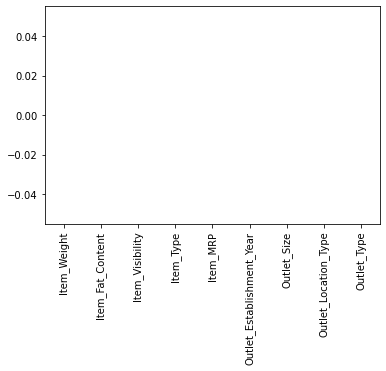

In [42]:
a=data_to_model['Item_Weight'].isna().sum()/len(data)
b=data_to_model['Item_Fat_Content'].isna().sum()/len(data)
c=data_to_model['Item_Visibility'].isna().sum()/len(data)
d=data_to_model['Item_Type'].isna().sum()/len(data)
e=data_to_model['Item_MRP'].isna().sum()/len(data)
f=data_to_model['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data_to_model['Outlet_Size'].isna().sum()/len(data)
h=data_to_model['Outlet_Location_Type'].isna().sum()/len(data)
i=data_to_model['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


Dealing with products having 0.00 Item_visibility but significant sales

In [43]:
data_to_model[data_to_model['Item_Visibility']==0.00]['Outlet_Identifier'].value_counts()

OUT018    65
OUT046    61
OUT013    59
OUT045    58
OUT017    57
OUT027    57
OUT035    54
OUT049    53
OUT010    29
OUT019    29
Name: Outlet_Identifier, dtype: int64

Some products had zero item visibilty but had (some) sales. In real world scenario this is impossible.
So, again a similar process was followed. Each of the different outlets were segregated again each into a 
dataframe and the products having 0.00 visibilty was replaced with the mean visibilty of each products of that particular 
outlet in the original dataframe

In [44]:
data_visib_zero=data_to_model[data_to_model['Item_Visibility']==0.00]


o18=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT018']
o18['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT018']['Item_Visibility'].mean(),inplace=True)

o46=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT046']
o46['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT046']['Item_Visibility'].mean(), inplace=True)

o13=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT013']
o13['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT013']['Item_Visibility'].mean(), inplace=True)

o45=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT045']
o45['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT045']['Item_Visibility'].mean(), inplace=True)

o17=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT017']
o17['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT017']['Item_Visibility'].mean(), inplace=True)

o27=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT027']
o27['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT027']['Item_Visibility'].mean(), inplace=True)

o35=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT035']
o35['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT035']['Item_Visibility'].mean(), inplace=True)

o49=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT049']
o49['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT049']['Item_Visibility'].mean(), inplace=True)

o10=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT010']
o10['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT010']['Item_Visibility'].mean(), inplace=True)

o19=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT019']
o19['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT019']['Item_Visibility'].mean(),inplace=True)



data_filled_visib=pd.concat([o18, o46, o13, o45, o17, o27, o35, o49, o10, o19])



C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
data_to_model=data_to_model[data_to_model.Item_Visibility!=0.0]

data_to_model=pd.concat([data_to_model,data_filled_visib])


data_to_model

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,3,Supermarket Type1,3735.1380
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,1,Supermarket Type2,443.4228
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1.0,3,Supermarket Type1,2097.2700
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,2.0,1,Supermarket Type1,343.5528
11,FDA03,18.500000,1,0.045464,Dairy,144.1102,OUT046,1997,0.0,3,Supermarket Type1,2187.1530
...,...,...,...,...,...,...,...,...,...,...,...,...
6979,NCK17,13.142314,0,0.108462,Health and Hygiene,40.3480,OUT019,1985,0.0,3,Grocery Store,79.8960
5894,FDH31,12.817344,1,0.108462,Meat,98.2042,OUT019,1985,0.0,3,Grocery Store,198.4084
7351,FDV39,12.817344,0,0.108462,Meat,196.8426,OUT019,1985,0.0,3,Grocery Store,593.2278
1913,DRK49,11.847460,0,0.108462,Soft Drinks,40.5138,OUT019,1985,0.0,3,Grocery Store,40.6138


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

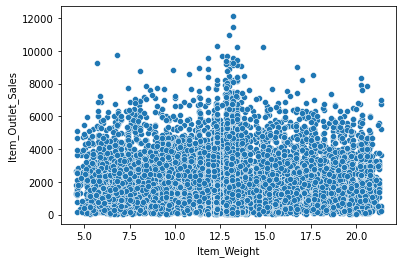

In [46]:
sns.scatterplot(x=data_to_model['Item_Weight'],y=data_to_model['Item_Outlet_Sales'])

Finally, all the columns of the dataframe have non-nan values

In [47]:
data_to_model.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,Dairy,249.8092,1999,1.0,3,Supermarket Type1,3735.1380
1,5.920000,1,0.019278,Soft Drinks,48.2692,2009,1.0,1,Supermarket Type2,443.4228
2,17.500000,0,0.016760,Meat,141.6180,1999,1.0,3,Supermarket Type1,2097.2700
6,13.650000,1,0.012741,Snack Foods,57.6588,1987,2.0,1,Supermarket Type1,343.5528
11,18.500000,1,0.045464,Dairy,144.1102,1997,0.0,3,Supermarket Type1,2187.1530
...,...,...,...,...,...,...,...,...,...,...
6979,13.142314,0,0.108462,Health and Hygiene,40.3480,1985,0.0,3,Grocery Store,79.8960
5894,12.817344,1,0.108462,Meat,98.2042,1985,0.0,3,Grocery Store,198.4084
7351,12.817344,0,0.108462,Meat,196.8426,1985,0.0,3,Grocery Store,593.2278
1913,11.847460,0,0.108462,Soft Drinks,40.5138,1985,0.0,3,Grocery Store,40.6138


In [48]:
data_dum=pd.get_dummies(data_to_model,columns=['Outlet_Type','Item_Type'])

year_encoder(data_dum)

In [49]:
data_dum.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300000,0,0.016047,249.8092,12,1.0,3,3735.1380,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,1,0.019278,48.2692,2,1.0,1,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,0,0.016760,141.6180,12,1.0,3,2097.2700,0,1,...,0,0,0,0,1,0,0,0,0,0
6,13.650000,1,0.012741,57.6588,24,2.0,1,343.5528,0,1,...,0,0,0,0,0,0,0,1,0,0
11,18.500000,1,0.045464,144.1102,14,0.0,3,2187.1530,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,13.142314,0,0.108462,40.3480,26,0.0,3,79.8960,1,0,...,0,0,1,0,0,0,0,0,0,0
5894,12.817344,1,0.108462,98.2042,26,0.0,3,198.4084,1,0,...,0,0,0,0,1,0,0,0,0,0
7351,12.817344,0,0.108462,196.8426,26,0.0,3,593.2278,1,0,...,0,0,0,0,1,0,0,0,0,0
1913,11.847460,0,0.108462,40.5138,26,0.0,3,40.6138,1,0,...,0,0,0,0,0,0,0,0,1,0


Henceforth, some items had close to zero item visibility but very high sales. Infact, as apparent from the plot,
they had the highest item sales from that particular outlet. This is also, particularly impossible because for the product to
have such a high sale (being the highest sale), it is a given that the product should have a atleast a fair item visibility.
So, particularly items with the highest sale and very low high visibility (i.e in the language of Data Science, 'Outliers') were
dealt with by replacing the Item_visibility with the average item visibility of the store, the product is present in.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

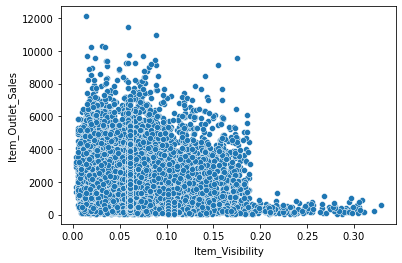

In [50]:
sns.scatterplot(x=data_dum['Item_Visibility'], y=data_dum['Item_Outlet_Sales'])

In [51]:
data_dum.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300000,0,0.016047,249.8092,OUT049,12,1.0,3,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920000,1,0.019278,48.2692,OUT018,2,1.0,1,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500000,0,0.016760,141.6180,OUT049,12,1.0,3,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,FDO10,13.650000,1,0.012741,57.6588,OUT013,24,2.0,1,343.5528,...,0,0,0,0,0,0,0,1,0,0
4,FDA03,18.500000,1,0.045464,144.1102,OUT046,14,0.0,3,2187.1530,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,NCK17,13.142314,0,0.108462,40.3480,OUT019,26,0.0,3,79.8960,...,0,0,1,0,0,0,0,0,0,0
8355,FDH31,12.817344,1,0.108462,98.2042,OUT019,26,0.0,3,198.4084,...,0,0,0,0,1,0,0,0,0,0
8356,FDV39,12.817344,0,0.108462,196.8426,OUT019,26,0.0,3,593.2278,...,0,0,0,0,1,0,0,0,0,0
8357,DRK49,11.847460,0,0.108462,40.5138,OUT019,26,0.0,3,40.6138,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data_dum[data_dum['Outlet_Identifier']=='OUT027']['Item_Visibility'].max()

0.182514881

In [53]:
data_dum[data_dum['Item_Outlet_Sales']>12000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5223,FDQ19,13.224769,1,0.014296,242.6512,OUT027,26,1.0,1,12117.56,...,1,0,0,0,0,0,0,0,0,0


In [54]:
data_dum.at[5223,'Item_Visibility']=0.18251
data_dum.loc[[5223]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5223,FDQ19,13.224769,1,0.18251,242.6512,OUT027,26,1.0,1,12117.56,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

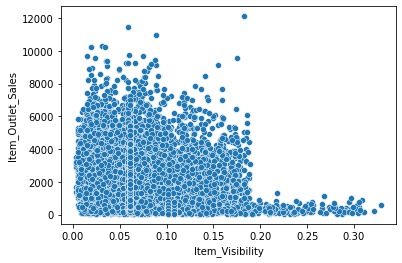

In [55]:
sns.scatterplot(x=data_dum['Item_Visibility'], y=data_dum['Item_Outlet_Sales'])

In [56]:
data_dum[data_dum['Item_Outlet_Sales']>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
4888,FDF39,14.850000,1,0.019495,261.2910,OUT013,24,2.0,1,10256.6490,...,0,0,0,0,0,0,0,0,0,0
5223,FDQ19,13.224769,1,0.182510,242.6512,OUT027,26,1.0,1,12117.5600,...,1,0,0,0,0,0,0,0,0,0
4349,FDP33,12.987880,0,0.088840,254.2672,OUT027,26,1.0,1,10993.6896,...,0,0,0,0,0,0,0,1,0,0
6541,FDI50,12.305705,1,0.030693,228.0352,OUT027,26,1.0,1,10306.5840,...,0,0,0,0,0,0,0,0,0,0
1009,FDU14,13.426069,0,0.034584,248.3750,OUT027,26,1.0,1,10236.6750,...,0,0,0,0,0,0,0,0,0,0
1450,FDZ20,13.224769,0,0.058993,253.0356,OUT027,26,1.0,1,11445.1020,...,1,0,0,0,0,0,0,0,0,0


In [57]:
data_dum[data_dum['Outlet_Identifier']=='OUT013']['Item_Visibility'].max()

0.185704641

In [58]:
data_dum.at[4888,'Item_Visibility']=0.18570
data_dum.at[4349,'Item_Visibility']=0.18251
data_dum.at[6541,'Item_Visibility']=0.18251
data_dum.at[1009,'Item_Visibility']=0.18251
data_dum.at[1450,'Item_Visibility']=0.18251
data_dum.at[5223,'Item_Visibility']=0.18251

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

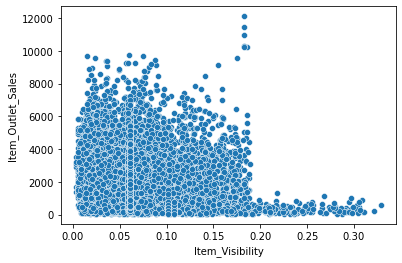

In [59]:
sns.scatterplot(x=data_dum['Item_Visibility'], y=data_dum['Item_Outlet_Sales'])

In [60]:
data_dum

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300000,0,0.016047,249.8092,OUT049,12,1.0,3,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920000,1,0.019278,48.2692,OUT018,2,1.0,1,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500000,0,0.016760,141.6180,OUT049,12,1.0,3,2097.2700,...,0,0,0,0,1,0,0,0,0,0
6,FDO10,13.650000,1,0.012741,57.6588,OUT013,24,2.0,1,343.5528,...,0,0,0,0,0,0,0,1,0,0
11,FDA03,18.500000,1,0.045464,144.1102,OUT046,14,0.0,3,2187.1530,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,NCK17,13.142314,0,0.108462,40.3480,OUT019,26,0.0,3,79.8960,...,0,0,1,0,0,0,0,0,0,0
5894,FDH31,12.817344,1,0.108462,98.2042,OUT019,26,0.0,3,198.4084,...,0,0,0,0,1,0,0,0,0,0
7351,FDV39,12.817344,0,0.108462,196.8426,OUT019,26,0.0,3,593.2278,...,0,0,0,0,1,0,0,0,0,0
1913,DRK49,11.847460,0,0.108462,40.5138,OUT019,26,0.0,3,40.6138,...,0,0,0,0,0,0,0,0,1,0


In [61]:
data_dum_copy=data_dum

data_dum['Outlet_Comb']=data_dum.Outlet_Establishment_Year+data_dum.Outlet_Size+data_dum.Outlet_Location_Type

In [62]:
data_dum

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Comb
0,FDA15,9.300000,0,0.016047,249.8092,OUT049,12,1.0,3,3735.1380,...,0,0,0,0,0,0,0,0,0,16.0
1,DRC01,5.920000,1,0.019278,48.2692,OUT018,2,1.0,1,443.4228,...,0,0,0,0,0,0,0,1,0,4.0
2,FDN15,17.500000,0,0.016760,141.6180,OUT049,12,1.0,3,2097.2700,...,0,0,0,1,0,0,0,0,0,16.0
6,FDO10,13.650000,1,0.012741,57.6588,OUT013,24,2.0,1,343.5528,...,0,0,0,0,0,0,1,0,0,27.0
11,FDA03,18.500000,1,0.045464,144.1102,OUT046,14,0.0,3,2187.1530,...,0,0,0,0,0,0,0,0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,NCK17,13.142314,0,0.108462,40.3480,OUT019,26,0.0,3,79.8960,...,0,1,0,0,0,0,0,0,0,29.0
5894,FDH31,12.817344,1,0.108462,98.2042,OUT019,26,0.0,3,198.4084,...,0,0,0,1,0,0,0,0,0,29.0
7351,FDV39,12.817344,0,0.108462,196.8426,OUT019,26,0.0,3,593.2278,...,0,0,0,1,0,0,0,0,0,29.0
1913,DRK49,11.847460,0,0.108462,40.5138,OUT019,26,0.0,3,40.6138,...,0,0,0,0,0,0,0,1,0,29.0


In [63]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X=data_dum.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Comb'], axis=1)


y=data_dum.Item_Outlet_Sales




In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5959,21.250,0,0.019407,119.3756,OUT013,24,2.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1587,9.695,1,0.029159,174.5370,OUT035,7,0.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
436,10.100,0,0.054631,200.2084,OUT046,14,0.0,3,0,1,...,0,0,1,0,0,0,0,0,0,0
1091,14.850,1,0.009931,157.4630,OUT013,24,2.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2819,19.600,0,0.024222,45.5718,OUT035,7,0.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,7.500,0,0.036383,177.9028,OUT018,2,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4182,16.500,0,0.028476,91.0146,OUT045,9,0.0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
3389,17.700,1,0.027779,50.1034,OUT010,13,0.0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8109,12.850,0,0.033193,199.0768,OUT013,24,2.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [70]:
X_save=X_test
#X_save contains the X-test data but with the outlet_identifier which would be later used in the result validation process


X=data_dum.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Comb','Outlet_Identifier'], axis=1)
y=data_dum.Item_Outlet_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
X_save.reset_index(drop=True)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,21.250,0,0.019407,119.3756,OUT013,24,2.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,9.695,1,0.029159,174.5370,OUT035,7,0.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10.100,0,0.054631,200.2084,OUT046,14,0.0,3,0,1,...,0,0,1,0,0,0,0,0,0,0
3,14.850,1,0.009931,157.4630,OUT013,24,2.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,19.600,0,0.024222,45.5718,OUT035,7,0.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,7.500,0,0.036383,177.9028,OUT018,2,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1668,16.500,0,0.028476,91.0146,OUT045,9,0.0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
1669,17.700,1,0.027779,50.1034,OUT010,13,0.0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1670,12.850,0,0.033193,199.0768,OUT013,24,2.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


Importing all the necessary libraries for measurung accuracy

In [68]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae


In [72]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [73]:
y_pred=regressor.predict(X_test)


r2_score(y_test, y_pred)

0.18591414423669772

### Using XGboost Regressor model

In [74]:

model = XGBRegressor()


model.fit(X_train, y_train)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#from numpy import absolute
#scores = absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
#y_pred3=model.predict(X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
y_xgbst_pred=model.predict(X_test)

r2_score(y_test, y_xgbst_pred)

0.5195859100751303

In [76]:
y_xgbst_pred_train=model.predict(X_train)

r2_score(y_train, y_xgbst_pred_train)

0.8526201628018594

### Using Linear Regression model

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
rgrss=LinearRegression()

rgrss.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_rgrss=rgrss.predict(X_test)
r2_score(y_test, y_pred_rgrss)

0.5563535916097185

In [80]:
y_pred_rgrss_train=rgrss.predict(X_train)
r2_score(y_train, y_pred_rgrss_train)

0.5594900090796251

### Random Forest

In [81]:

from sklearn.ensemble import RandomForestRegressor
 

regressorrgf = RandomForestRegressor(n_estimators = 150, random_state = 101)
 

regressorrgf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=150, random_state=101)

In [82]:
y_pred_rgrssgf=regressorrgf.predict(X_test)
r2_score(y_test, y_pred_rgrssgf)



0.540079434924472

In [83]:
y_pred_rgrssgf_train=regressorrgf.predict(X_train)
r2_score(y_train, y_pred_rgrssgf_train)


0.937837731045735

### Hyper-parameter Tuning

In [87]:
from pprint import pprint


from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 77, 105, 133, 161, 188, 216, 244, 272, 300]}


In [88]:

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=101, verbose=2)

In [89]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    r2_scoring=r2_score(test_labels, predictions)
    print(r2_scoring)
    
    return r2_scoring


base_model = RandomForestRegressor(n_estimators = 150, random_state =101)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test,y_test )

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test, y_test)



0.540079434924472
0.5719053241756715


In [90]:
rf_random.best_params_

{'n_estimators': 161,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['auto'],
    'min_samples_leaf': [4],
    'min_samples_split': [5],
    'n_estimators': [150]
}

rf_CV = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf_CV, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

### Highest score achieved, hence considered for final prediction

In [94]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.5746891250859336


In [109]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(best_grid, filename)

['finalized_model.sav']

In [110]:
import pickle

saved_best_model=pickle.dumps(best_grid)

In [111]:
load_saved_model=pickle.loads(saved_best_model)
final_results=load_saved_model.predict(X_test)
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5959,21.250,0,0.019407,119.3756,24,2.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1587,9.695,1,0.029159,174.5370,7,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
436,10.100,0,0.054631,200.2084,14,0.0,3,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1091,14.850,1,0.009931,157.4630,24,2.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2819,19.600,0,0.024222,45.5718,7,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,7.500,0,0.036383,177.9028,2,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4182,16.500,0,0.028476,91.0146,9,0.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3389,17.700,1,0.027779,50.1034,13,0.0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8109,12.850,0,0.033193,199.0768,24,2.0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
X_save['Predicted_Sales']=final_results
X_save['Actual Sales']=y_test

In [114]:
year_decoder(X_save)


X_save

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Predicted_Sales,Actual Sales,Difference_in_results
5959,21.250,0,0.019407,119.3756,OUT013,1987,2.0,1,0,1,...,0,0,0,0,1,0,0,1956.387545,3271.7412,1315.353655
1587,9.695,1,0.029159,174.5370,OUT035,2004,0.0,2,0,1,...,0,0,0,0,0,0,0,2894.874265,1235.0590,1659.815265
436,10.100,0,0.054631,200.2084,OUT046,1997,0.0,3,0,1,...,0,0,0,0,0,0,0,3159.526326,1587.2672,1572.259126
1091,14.850,1,0.009931,157.4630,OUT013,1987,2.0,1,0,1,...,0,0,0,0,1,0,0,2519.669465,2503.4080,16.261465
2819,19.600,0,0.024222,45.5718,OUT035,2004,0.0,2,0,1,...,0,0,0,0,0,0,0,792.429374,945.4360,153.006626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,7.500,0,0.036383,177.9028,OUT018,2009,1.0,1,0,0,...,0,0,0,0,0,0,0,2644.984832,1416.8224,1228.162432
4182,16.500,0,0.028476,91.0146,OUT045,2002,0.0,2,0,1,...,0,0,0,0,1,0,0,1387.145904,1368.2190,18.926904
3389,17.700,1,0.027779,50.1034,OUT010,1998,0.0,1,1,0,...,0,0,0,0,0,0,0,137.267538,97.2068,40.060738
8109,12.850,0,0.033193,199.0768,OUT013,1987,2.0,1,0,1,...,0,0,0,0,0,0,0,3051.035595,3153.2288,102.193205


### Visualizations for result accuracy cross-check

In [116]:
Outlet_list=['OUT017','OUT018','OUT035','OUT046','OUT049','OUT045','OUT027','OUT013','OUT010','OUT019']
predicted_avg_list=[]
actual_avg_list=[]

rmse=[]

for i in range(len(Outlet_list)):
    X_test_OUTlet=X_save[X_save['Outlet_Identifier']==Outlet_list[i]]

    X_test_OUTlet_predicted_avg=X_test_OUTlet['Predicted_Sales'].mean()
    X_test_OUTlet_actual_avg=X_test_OUTlet['Actual Sales'].mean()
    
    
    predicted_avg_list.append(X_test_OUTlet_predicted_avg)
    actual_avg_list.append(X_test_OUTlet_actual_avg)



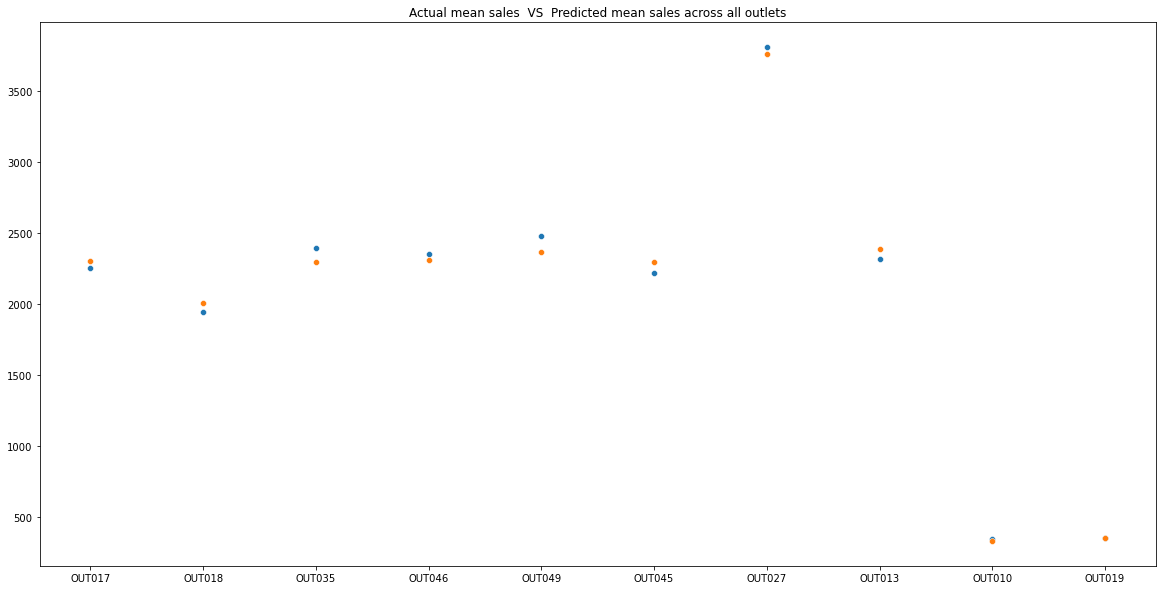

<Figure size 432x288 with 0 Axes>

In [124]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=Outlet_list, y=actual_avg_list)
sns.scatterplot(x=Outlet_list, y=predicted_avg_list)
plt.title('Actual mean sales  VS  Predicted mean sales across all outlets')


plt.show()
plt.savefig('Act vs Pred')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Predicted_Sales'>

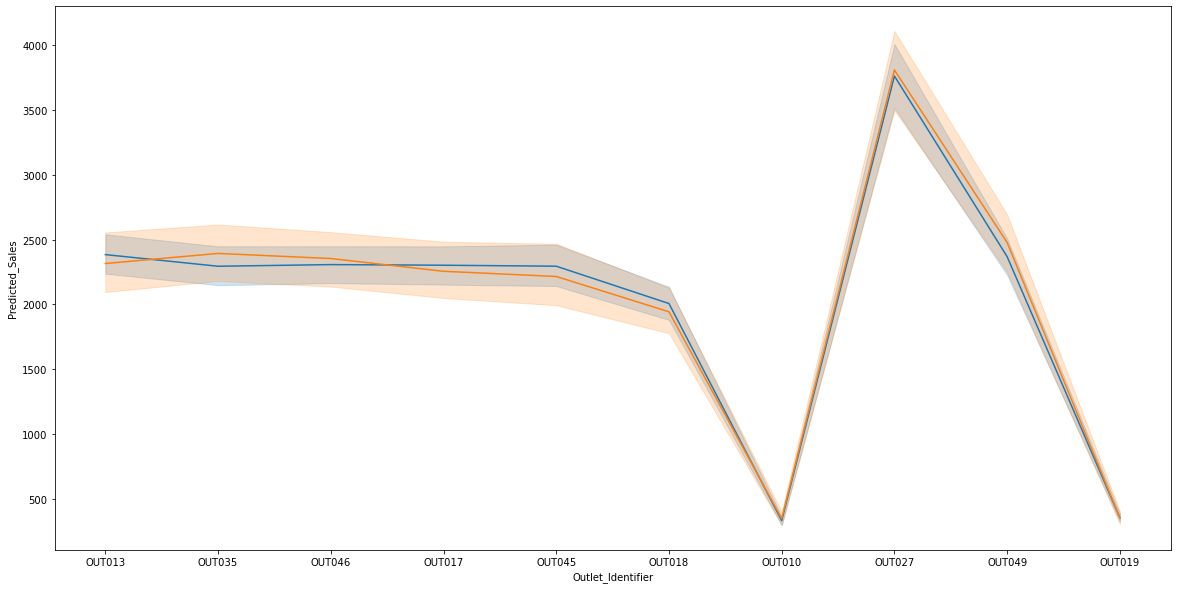

In [119]:
plt.figure(figsize=(20,10))

sns.lineplot(x=X_save['Outlet_Identifier'], y=X_save['Predicted_Sales'])
sns.lineplot(x=X_save['Outlet_Identifier'], y=X_save['Actual Sales'])

In [121]:
actual_avg_list

[2255.389458937198,
 1942.6340790697668,
 2393.3104753926696,
 2353.8385907692304,
 2477.2072568181807,
 2215.175003508774,
 3809.6268969696976,
 2315.3920551282035,
 345.8799887850469,
 352.8141528089888]